In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, skimage, dataset, cv2
from skimage import io, transform
from tqdm import tqdm
from copy import copy
from tools import *
from reload import *

%matplotlib inline

In [2]:
dataset = reload()

[ Load Dataset ]: 100%|██████████| 5067/5067 [00:33<00:00, 152.26it/s]


In [3]:
train_dataset = dataset.train_dataset.transpose(0,2,3,1).reshape(3375,-1)
test_dataset = dataset.test_dataset.transpose(0,2,3,1).reshape(len(dataset.test_dataset),-1)

## RandomForest

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_dataset, dataset.train_labels)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [5]:
result_fc = forest_clf.predict(test_dataset)

In [6]:
from sklearn.metrics import confusion_matrix

fc_conf=confusion_matrix(result_fc,dataset.test_labels)

In [7]:
fc_conf

array([[715, 122, 117, 107, 117],
       [ 27,  21,  36,  33,  21],
       [ 29,  25,  41,  42,  34],
       [ 28,  26,  30,  21,  20],
       [ 10,  13,  22,  26,   9]])

0.4769503546099291


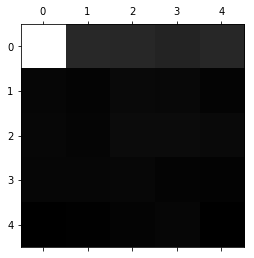

In [8]:
print(sum(fc_conf[i,i] for i in range(len(fc_conf)))/len(result_fc))
plt.matshow(fc_conf, cmap=plt.cm.gray)

## SGDClassifier

In [9]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(train_dataset, dataset.train_labels)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [10]:
result_sgd = clf.predict(test_dataset)
sgd_conf=confusion_matrix(result_sgd, dataset.test_labels)

In [11]:
sgd_conf

array([[554,  46,  16,  14,  23],
       [ 68,  44,  25,  19,  21],
       [ 36,  43,  63,  56,  28],
       [ 99,  60,  96,  88,  71],
       [ 52,  14,  46,  52,  58]])

0.4769503546099291


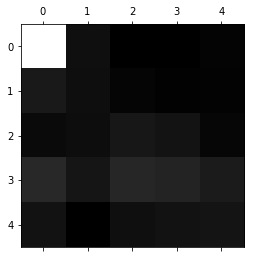

In [12]:
print(sum(sgd_conf[i,i] for i in range(len(sgd_conf)))/len(result_sgd))
plt.matshow(sgd_conf, cmap=plt.cm.gray)

## MultiClass

In [13]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(train_dataset, dataset.train_labels)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they defaul

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [14]:
result_ovo=ovo_clf.predict(test_dataset)

0.5466903073286052


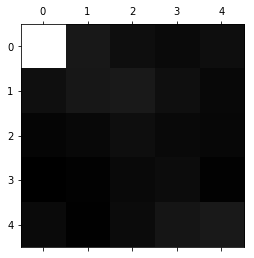

In [15]:
ovo_conf=confusion_matrix(result_ovo,dataset.test_labels)
print(sum(ovo_conf[i,i] for i in range(len(ovo_conf)))/len(result_ovo))
plt.matshow(ovo_conf, cmap=plt.cm.gray)

In [16]:
ovo_conf

array([[688,  75,  48,  37,  48],
       [ 51,  71,  77,  51,  31],
       [ 23,  32,  48,  33,  29],
       [  9,  15,  33,  41,  16],
       [ 38,  14,  40,  67,  77]])

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=32)
knn_clf.fit(train_dataset, dataset.train_labels)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
           weights='distance')

In [18]:
result_knn = knn_clf.predict(test_dataset)

In [19]:
from sklearn.metrics import confusion_matrix
kn_conf=confusion_matrix(result_knn,dataset.test_labels)

In [20]:
kn_conf

array([[794, 188, 214, 186, 178],
       [  2,   1,   4,   3,   1],
       [  5,   9,  12,  15,  13],
       [  7,   9,  12,  19,   7],
       [  1,   0,   4,   6,   2]])

0.48936170212765956


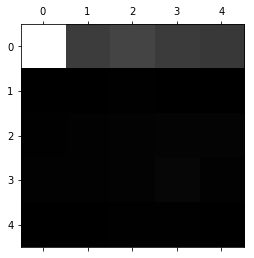

In [21]:
print(sum(kn_conf[i,i] for i in range(len(kn_conf)))/len(result_knn))
plt.matshow(kn_conf, cmap=plt.cm.gray)